# Demostration of the recommenders

In [1]:
import pandas as pd
import numpy as np
import time
%matplotlib inline
import matplotlib.pyplot as plt
from surprise import dump
from evaluation.Evaluate import Evaluate, Evaluate_CFR

import model.CollaborativeFilteringRec as CFR
from model.CollaborativeFilteringRec import train_cf_models

#import model.HybridRecommendationSystem as HR
from model.ContentBasedRec import ContentBasedRecommender, get_CBMatrix
from model.HybridRecommendationSystem import HybridRecommender, get_HRMatrix

movie_df = pd.read_csv('./data/external/movies.csv')

# pick a random user
ratings = pd.read_csv('./data/processed/final_ratings.csv')
print(len(ratings.userId.unique()))
random_user = np.random.choice(ratings.userId.unique()) # picks a random user

1004


## Preprocessing
* Preprocessed data for both content-based and colloborative filtering systems.
* Updates the precalculated dataframes.

In [37]:
print("Prerocessing for Collaborative Filtering Recommender...")
from data_script.preprocess_collaborative import sveta_user_id, hamid_user_id
# import clustering_collaborative #TODO

Prerocessing for Collaborative Filtering Recommender...
Creating raw dataframes...
Creating dataframes with Sveta and Hamid ratings...
Creating dataframes with anti-Sveta and anti-Hamid ratings...
Creating new ratings dataframe for collaborative filtering ...
Out of total of  138493  users,  64051  are considered lazy and will be removed.
The final number of users is  74442
Randomly choosing 1000 users...
Adding Sviatlana's and Hamid's ratings... we are lazy users, but still...
Sveta 's user id is 86968
Hamid 's user id is 27844
Adding anti-Sviatlana's and anti-Hamid's ratings... they are lazy users, but still...
anti-Sveta 's user id is 8633
anti-Hamid 's user id is 73687
Now, the final number of users is  1004
Filtering movies...
Out of total of  9486  movies,  8863  are considered rare and will be removed.
The final number of movies is  623
Creating the pivot matrix...
The resulting sparcity of the matrix is: 0.8019191292614454
Preparing the final rating matrix...
Data preprocesssin

In [4]:
#sveta_user_id, hamid_user_id # or use sveta and hamid's id (assigned randomly at the preprocessing step

In [5]:
print("Prerocessing for Content-Based Recommender...")
from data_script.preprocess_content_based import get_df_ContBaseRec
df_ContBaseRec = get_df_ContBaseRec()

Prerocessing for Content-Based Recommender...


/home/mumu/Documents/DS/movie_recommendation_ProjectCDS/data_script/preprocess_content_based.py:93: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  dummies = pd.get_dummies(df_movies.genres.apply(pd.Series).stack()).sum(level=0)


## Train Nearest Neighbor CB model

In [2]:
nn = CBR.train_nearest_neighbors_model()

## Training and saving CF models

In [8]:
trainset, testset, data, algo, algo_predictions, knn, knn_predictions = train_cf_models()

Getting the ratings matrix...
Preparing data in the Suprise format...
Training and saving a KNN model for calculating the CF model weights in hybrid setup..
Mean CV RMSE is 0.837
Training KNN-based memory based model for hybrid...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Mean CV RMSE is 0.933
Training is done!


## Content-based recommender

In [11]:
cb_recommender = ContentBasedRecommender()

In [ ]:
# Run to recomputer the CBMatrix
start_time = time.time()
cb_recommendations = get_CBMatrix()
end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time: ", elapsed_time)
cb_recommendations.head()

In [10]:
# Get the CBMatrix
cb_recommender = ContentBasedRecommender()
cb_recommendations = cb_recommender.df_recommendations
cb_recommendations.head()

,userId,1,2,3,4,5,6,7,8,9,...,130075,130087,130490,130496,130520,130578,130840,131013,131168,131170
0,73687,NaN,0.545045,0.665229,NaN,NaN,NaN,NaN,0.558663,0.538763,...,0.519058,NaN,0.449878,0.643524,0.496660,0.533135,0.613908,0.557084,0.649311,0.601671
1,8633,NaN,NaN,0.558319,NaN,NaN,0.807316,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.467845,0.655830,0.605724
2,27844,NaN,0.545045,0.665229,NaN,NaN,NaN,NaN,0.558663,0.538763,...,0.519058,NaN,0.449878,0.643524,0.496660,0.533135,0.613908,0.557084,0.649311,0.601671
3,86968,NaN,NaN,0.558319,NaN,NaN,0.807316,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.467845,0.655830,0.605724
4,186,NaN,0.753088,0.795874,0.730306,0.728662,0.639611,0.724683,0.721785,0.636189,...,0.666016,NaN,0.594067,0.723904,0.659503,0.593578,0.647815,0.630278,0.598122,0.645461


In [12]:
userId = 86968
cb_recommender.recommendation(userId, 20)

,movieId,score,title,genres
0,678,0.916408,Some Folks Call It a Sling Blade (1993),Drama|Thriller
1,1276,0.898239,Cool Hand Luke (1967),Drama
2,3681,0.887929,For a Few Dollars More (Per qualche dollaro in...,Action|Drama|Thriller|Western
3,1209,0.882586,Once Upon a Time in the West (C'era una volta ...,Action|Drama|Western
4,8340,0.880683,Escape from Alcatraz (1979),Drama|Thriller
5,104069,0.880032,Louis C.K.: Oh My God (2013),Comedy
6,56782,0.879797,There Will Be Blood (2007),Drama|Western
7,1358,0.878825,Sling Blade (1996),Drama
8,1201,0.878284,"Good, the Bad and the Ugly, The (Buono, il bru...",Action|Adventure|Western
9,2692,0.875562,Run Lola Run (Lola rennt) (1998),Action|Crime


In [18]:
#since the final rating and cb_recommendation matrix do reset_indexve the same set of users, we can only test the 
set_of_test_users = set(cb_recommendations.userId.values).intersection(set(ratings.userId.unique()))
print(len(set_of_test_users))

1004


## User-based colloborative filtering recommender

In [3]:
cf_model = CFR.CollaborativeFilteringRecommender()

In [12]:
random_user = np.random.choice(ratings.userId.unique()) # picks a random user
cf_model.recommend(random_user, 20).merge(movie_df, on='movieId', how='left')

,Unnamed: 0,userId,movieId,rating,cf_score,title,genres
0,0,65368,1200,4.740854,0.942412,Aliens (1986),Action|Adventure|Horror|Sci-Fi
1,1,65368,904,4.676829,0.928184,Rear Window (1954),Mystery|Thriller
2,2,65368,1197,4.571296,0.904733,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance
3,3,65368,1252,4.510143,0.891143,Chinatown (1974),Crime|Film-Noir|Mystery|Thriller
4,4,65368,246,4.462841,0.880631,Hoop Dreams (1994),Documentary
5,5,65368,58559,4.430358,0.873413,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX
6,6,65368,2248,4.408354,0.868523,Say Anything... (1989),Comedy|Drama|Romance
7,7,65368,3671,4.406336,0.868075,Blazing Saddles (1974),Comedy|Western
8,8,65368,1262,4.399502,0.866556,"Great Escape, The (1963)",Action|Adventure|Drama|War
9,9,65368,778,4.393952,0.865323,Trainspotting (1996),Comedy|Crime|Drama


## Hybrid recommender

In [2]:
hyb_recommender = HybridRecommender()

Getting the ratings matrix...
Preparing data in the Suprise format...
Computing the pearson similarity matrix...
Done computing similarity matrix.


In [ ]:
# Run to recomputer the HRMatrix
start_time = time.time()
hyb_recommendations = get_HRMatrix()
end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time: ", elapsed_time)
hyb_recommendations.head()

In [9]:
# Get the HRMatrix
hyb_recommendations = hyb_recommender.df_recommendations
hyb_recommendations.head()

,userId,1,2,3,4,5,6,7,8,9,...,130075,130087,130490,130496,130520,130578,130840,131013,131168,131170
0,73687,NaN,0.578596,0.698370,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8633,NaN,NaN,0.621519,NaN,NaN,0.879630,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27844,NaN,0.727339,0.857257,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,86968,NaN,NaN,0.658183,NaN,NaN,0.952319,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,186,NaN,0.807884,0.843629,NaN,0.777431,0.699742,0.779235,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
userId = 186
hyb_recommender.hybrid_recommendation(userId, 2)

,movieId,hybrid_score,title,genres
0,2804,0.898999,"Christmas Story, A (1983)",Children|Comedy
1,1302,0.886882,Field of Dreams (1989),Children|Drama|Fantasy


In [19]:
#since the final rating and cb_recommendation matrix do not have the same set of users, we can only test the 
set_of_test_users = set(hyb_recommendations.userId.values).intersection(set(hyb_recommendations.userId.values))
print(len(set_of_test_users))

27844 in set(hyb_recommendations.userId.values)

1000


True

# Evaluation of the different recommenders


## Accuracy of the collaborative system
* metrics: rmse
* method: cross-validation


In [4]:
cf_model.fit_and_predict()
cf_model.cross_validate()

Getting the ratings matrix...
Preparing data in the Suprise format...
Done calculating predictions and scores!
Cross Validating the data...
Mean CV RMSE is 0.832


0.832

## Variety
The measure represents the averaged percentage of all the movies recommended to all the users (1 corresponds to 100%).

In [3]:
Evaluate = Evaluate()

Getting the ratings matrix...
Preparing data in the Suprise format...
Computing the pearson similarity matrix...
Done computing similarity matrix.


In [8]:
variety_cf = Evaluate.variety_collaborative_filtering()
print("Collaborative filtering:", variety_cf)

Collaborative filtering: (0.247, 0.037)


In [4]:
variety_cb = Evaluate.variety_content_based()
print("Content-based:", variety_cb)

Content-based: (0.392, 0.085)


In [4]:
variety_hybrid = Evaluate.variety_hybrid()
print("Hybrid:", variety_hybrid)

Hybrid: (0.304, 0.058)


## Personalization
A personalised system is expected to suggest different movies for dissimilar users.

Mertic: overlap between suggestions for different users.

Similarity is taken from various similarity matrices.

In [3]:
evaluate = Evaluate()
evaluate.compute_surprise_similarity()

...Loading Content Based Recommender..
...Loading Hybrid Recommender..
Getting the ratings matrix...
Preparing data in the Suprise format...
Computing the pearson similarity matrix...
Done computing similarity matrix.
...Loading Collaborative Filtering Recommender..
Getting the ratings matrix...
Preparing data in the Suprise format...
...Computing KNN similarity matrix...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


In [6]:
result_cf = evaluate.personalisation('cf')
result_cb = evaluate.personalisation('cb')

In [4]:
result_hyb = evaluate.personalisation('hyb')

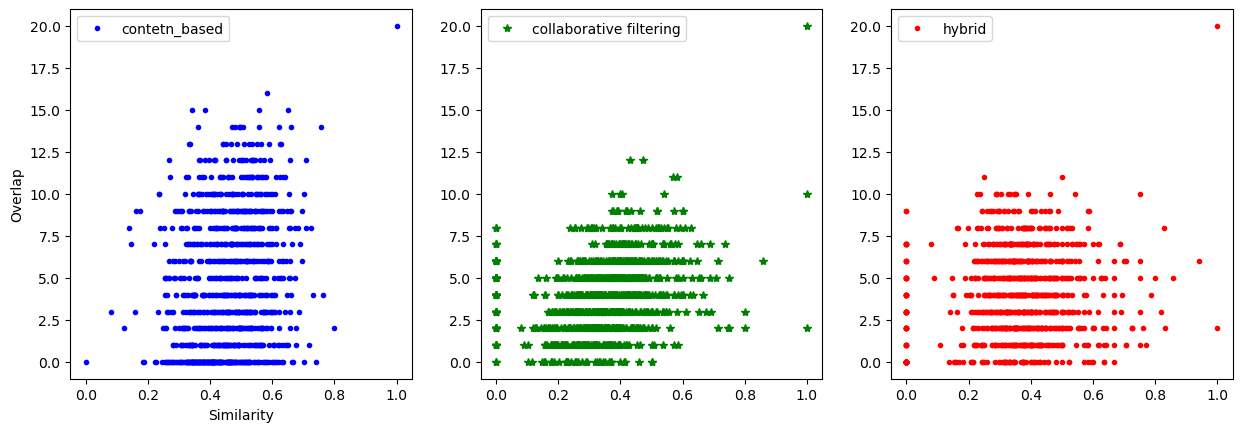

In [7]:
fig=plt.figure()
fig.set_figwidth(15)
ax=fig.add_subplot(131)
ax.set_xlabel('Similarity')
ax.set_ylabel('Overlap')
ax.plot(result_cb.similarity, result_cb.overlap, "b.", linewidth=0.2, label="contetn_based")
ax.legend()
ax=fig.add_subplot(132)
ax.plot(result_cf.similarity,result_cf.overlap, "g*", linewidth=0.2, label="collaborative filtering")
ax.legend()
ax=fig.add_subplot(133)
ax.plot(result_hyb.similarity, result_hyb.overlap, "r.", linewidth=0.9, label="hybrid")
ax.legend()

In [ ]:
def return_sims_above_threshold(similarities_df, threshold):
    return len(similarities_df[similarities_df.similarity > threshold])